In [1]:
#Importing NumPy, Pandas, and reading our dataset
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('parsed1.csv')

In [2]:
#Displaying Our Initial Data Set
data

Unnamed: 0              docket_no  \
0               0  MC-51-CR-0014123-2020   
1               1  MC-51-CR-0008508-2020   
2               2  MC-51-CR-0003947-2020   
3               3  MC-51-CR-0004886-2020   
4               4  MC-51-CR-0006777-2020   
...           ...                    ...   
13433       13433  MC-51-CR-0004589-2020   
13434       13434  MC-51-CR-0004919-2020   
13435       13435  MC-51-CR-0008497-2020   
13436       13436  MC-51-CR-0001729-2020   
13437       13437  MC-51-CR-0007289-2020   

                                                offenses offense_date  \
0      ['Rape Forcible Compulsion', 'Rape Forcible Co...    5/28/2020   
1      ['Aggravated Assault - Attempts to cause SBI o...     5/4/2020   
2      ['Simple Assault', 'Simple Assault', 'Reckless...     2/2/2020   
3      ['Contraband/Controlled Substance', 'Contraban...    2/10/2020   
4      ['Manufacture, Delivery, or Possession With In...    3/13/2020   
...                                                  ...          ...   
13433  ['Rape Forcible Compulsion', 'Rape Forcible Co...    1/15/2020   
13434  ['Burglary - Overnight Accommodations; Person ...   12/14/2019   
13435  ['Firearms Not To Be Carried W/O License', 'Fi...     5/3/2020   
13436  ['Possession Of Firearm Prohibited', 'Possessi...    1/19/2020   
13437  ['Terroristic Threats W/ Int To Terrorize Anot...    12/3/2019   

       arrest_dt case_status         arresting_officer  \
0      7/27/2020      Active        Bengochea, William   
1       5/4/2020      Active  Soares, Baldomiro J. Jr.   
2      2/12/2020      Active              Jones, James   
3      2/21/2020      Active          Balmer, James M.   
4      3/14/2020      Active             Sima, Raymond   
...          ...         ...                       ...   
13433  2/18/2020      Active         Lapetina, Sean M.   
13434  2/21/2020      Active                   Affiant   
13435   5/4/2020      Active            Kusowski, Mark   
13436  1/20/2020      Closed           Schell, John G.   
13437  3/25/2020      Active              Orth, Daniel   

                                    attorney         dob    zip  \
0      Defender Association of  Philadelphia   5/19/1993  19123   
1      Defender Association of  Philadelphia    5/5/1997  19121   
2      Defender Association of  Philadelphia  11/15/1986  19124   
3      Defender Association of  Philadelphia  12/13/1980  19135   
4                      Richard T. Brown Jr.    11/5/1997  19144   
...                                      ...         ...    ...   
13433                     Anthony J. Petrone   12/6/1985  19134   
13434  Defender Association of  Philadelphia   8/15/1999    NaN   
13435  Defender Association of  Philadelphia    6/7/1988  19134   
13436  Defender Association of  Philadelphia   2/25/1996  19100   
13437  Defender Association of  Philadelphia    8/8/1984  19135   

               bail_set_by  bail_amount  bail_paid  bail_date  bail_type  \
0      Bernard, Francis X.       300000          0  7/28/2020   Monetary   
1           E-Filing Judge        50000       5000   5/5/2020   Monetary   
2           Stack, Patrick         7500        750  2/13/2020   Monetary   
3      Bernard, Francis X.         5000          0  2/21/2020  Unsecured   
4           Stack, Patrick            0          0  3/14/2020        ROR   
...                    ...          ...        ...        ...        ...   
13433       O'Brien, James       100000          0  2/19/2020   Monetary   
13434     Devlin, Kevin R.         7500        750  3/11/2020   Monetary   
13435       E-Filing Judge        50000       5000   5/4/2020   Monetary   
13436       O'Brien, James       150000          0  1/20/2020   Monetary   
13437       O'Brien, James        25000          0  3/26/2020  Unsecured   

      prelim_hearing_dt prelim_hearing_time  \
0             7/28/2020             4:49 AM   
1              5/4/2020             5:33 PM   
2             2/13/2020             8:22 AM  

In [16]:
#This cell drops the columns we will not use, and renames all columns to more friendly names
data.drop(columns = ['docket_no','prelim_hearing_dt', 'prelim_hearing_time'],inplace= True)
data = data.rename(columns={"Unnamed: 0": "Index", "offenses": "Offenses", 'offense_date': "Offense Date", 'arrest_dt': "Arrest Date", 'case_status': "Case Status", 'arresting_officer': "Arresting Officer", 'attorney': "Attorney", 'dob': "Date of Birth", 'zip': "Zip", 'bail_set_by': "Bail Set By", 'bail_amount': "Bail Amount", 'bail_paid': "Bail Paid", 'bail_date': "Bail Date", 'bail_type': "Bail Type", 'parsed_offenses': "Parsed Offenses"})


Index                                           Offenses Offense Date  \
0          0  ['Rape Forcible Compulsion', 'Rape Forcible Co...    5/28/2020   
1          1  ['Aggravated Assault - Attempts to cause SBI o...     5/4/2020   
2          2  ['Simple Assault', 'Simple Assault', 'Reckless...     2/2/2020   
3          3  ['Contraband/Controlled Substance', 'Contraban...    2/10/2020   
4          4  ['Manufacture, Delivery, or Possession With In...    3/13/2020   
...      ...                                                ...          ...   
13433  13433  ['Rape Forcible Compulsion', 'Rape Forcible Co...    1/15/2020   
13434  13434  ['Burglary - Overnight Accommodations; Person ...   12/14/2019   
13435  13435  ['Firearms Not To Be Carried W/O License', 'Fi...     5/3/2020   
13436  13436  ['Possession Of Firearm Prohibited', 'Possessi...    1/19/2020   
13437  13437  ['Terroristic Threats W/ Int To Terrorize Anot...    12/3/2019   

      Arrest Date Case Status         Arresting Officer  \
0       7/27/2020      Active        Bengochea, William   
1        5/4/2020      Active  Soares, Baldomiro J. Jr.   
2       2/12/2020      Active              Jones, James   
3       2/21/2020      Active          Balmer, James M.   
4       3/14/2020      Active             Sima, Raymond   
...           ...         ...                       ...   
13433   2/18/2020      Active         Lapetina, Sean M.   
13434   2/21/2020      Active                   Affiant   
13435    5/4/2020      Active            Kusowski, Mark   
13436   1/20/2020      Closed           Schell, John G.   
13437   3/25/2020      Active              Orth, Daniel   

                                    Attorney Date of Birth    Zip  \
0      Defender Association of  Philadelphia     5/19/1993  19123   
1      Defender Association of  Philadelphia      5/5/1997  19121   
2      Defender Association of  Philadelphia    11/15/1986  19124   
3      Defender Association of  Philadelphia    12/13/1980  19135   
4                      Richard T. Brown Jr.      11/5/1997  19144   
...                                      ...           ...    ...   
13433                     Anthony J. Petrone     12/6/1985  19134   
13434  Defender Association of  Philadelphia     8/15/1999    NaN   
13435  Defender Association of  Philadelphia      6/7/1988  19134   
13436  Defender Association of  Philadelphia     2/25/1996  19100   
13437  Defender Association of  Philadelphia      8/8/1984  19135   

               Bail Set By  Bail Amount  Bail Paid  Bail Date  Bail Type  \
0      Bernard, Francis X.       300000          0  7/28/2020   Monetary   
1           E-Filing Judge        50000       5000   5/5/2020   Monetary   
2           Stack, Patrick         7500        750  2/13/2020   Monetary   
3      Bernard, Francis X.         5000          0  2/21/2020  Unsecured   
4           Stack, Patrick            0          0  3/14/2020        ROR   
...                    ...          ...        ...        ...        ...   
13433       O'Brien, James       100000          0  2/19/2020   Monetary   
13434     Devlin, Kevin R.         7500        750  3/11/2020   Monetary   
13435       E-Filing Judge        50000       5000   5/4/2020   Monetary   
13436       O'Brien, James       150000          0  1/20/2020   Monetary   
13437       O'Brien, James        25000          0  3/26/2020  Unsecured   

                                         Parsed Offenses  
0      ['False Imprisonment', 'Indec Asslt-W/O Cons O...  
1      ['Aggravated Assault - Attempts to cause SBI o...  
2      ['Recklessly Endangering Another Person', 'Sim...  
3      ['Contraband/Controlled Substance', 'Int Poss ...  
4      ['Conspiracy', 'Int Poss Contr Subst By Per No...  
...                                                  ...  
13433  ['Corruption Of Minors - Defendant Age 18 or A...  
13434  ['Burglary - Overnight Accommodations; Person ...  
13435  ['Carry Firearms Public In Phila', 'Firearms N...  
13436

In [19]:
#Brendan, do not run this cell at all costs!
#Converting Dates to a Format that they can be edited
data['Arrest Date'] = pd.to_datetime(data['Arrest Date'])
data['Date of Birth'] = pd.to_datetime(data['Date of Birth'])
data['Bail Date'] = pd.to_datetime(data['Bail Date'])

In [20]:
data

Index                                           Offenses Offense Date  \
0          0  ['Rape Forcible Compulsion', 'Rape Forcible Co...    5/28/2020   
1          1  ['Aggravated Assault - Attempts to cause SBI o...     5/4/2020   
2          2  ['Simple Assault', 'Simple Assault', 'Reckless...     2/2/2020   
3          3  ['Contraband/Controlled Substance', 'Contraban...    2/10/2020   
4          4  ['Manufacture, Delivery, or Possession With In...    3/13/2020   
...      ...                                                ...          ...   
13433  13433  ['Rape Forcible Compulsion', 'Rape Forcible Co...    1/15/2020   
13434  13434  ['Burglary - Overnight Accommodations; Person ...   12/14/2019   
13435  13435  ['Firearms Not To Be Carried W/O License', 'Fi...     5/3/2020   
13436  13436  ['Possession Of Firearm Prohibited', 'Possessi...    1/19/2020   
13437  13437  ['Terroristic Threats W/ Int To Terrorize Anot...    12/3/2019   

      Arrest Date Case Status         Arresting Officer  \
0      2020-07-27      Active        Bengochea, William   
1      2020-05-04      Active  Soares, Baldomiro J. Jr.   
2      2020-02-12      Active              Jones, James   
3      2020-02-21      Active          Balmer, James M.   
4      2020-03-14      Active             Sima, Raymond   
...           ...         ...                       ...   
13433  2020-02-18      Active         Lapetina, Sean M.   
13434  2020-02-21      Active                   Affiant   
13435  2020-05-04      Active            Kusowski, Mark   
13436  2020-01-20      Closed           Schell, John G.   
13437  2020-03-25      Active              Orth, Daniel   

                                    Attorney Date of Birth    Zip  \
0      Defender Association of  Philadelphia    1993-05-19  19123   
1      Defender Association of  Philadelphia    1997-05-05  19121   
2      Defender Association of  Philadelphia    1986-11-15  19124   
3      Defender Association of  Philadelphia    1980-12-13  19135   
4                      Richard T. Brown Jr.     1997-11-05  19144   
...                                      ...           ...    ...   
13433                     Anthony J. Petrone    1985-12-06  19134   
13434  Defender Association of  Philadelphia    1999-08-15    NaN   
13435  Defender Association of  Philadelphia    1988-06-07  19134   
13436  Defender Association of  Philadelphia    1996-02-25  19100   
13437  Defender Association of  Philadelphia    1984-08-08  19135   

               Bail Set By  Bail Amount  Bail Paid  Bail Date  Bail Type  \
0      Bernard, Francis X.       300000          0 2020-07-28   Monetary   
1           E-Filing Judge        50000       5000 2020-05-05   Monetary   
2           Stack, Patrick         7500        750 2020-02-13   Monetary   
3      Bernard, Francis X.         5000          0 2020-02-21  Unsecured   
4           Stack, Patrick            0          0 2020-03-14        ROR   
...                    ...          ...        ...        ...        ...   
13433       O'Brien, James       100000          0 2020-02-19   Monetary   
13434     Devlin, Kevin R.         7500        750 2020-03-11   Monetary   
13435       E-Filing Judge        50000       5000 2020-05-04   Monetary   
13436       O'Brien, James       150000          0 2020-01-20   Monetary   
13437       O'Brien, James        25000          0 2020-03-26  Unsecured   

                                         Parsed Offenses  
0      ['False Imprisonment', 'Indec Asslt-W/O Cons O...  
1      ['Aggravated Assault - Attempts to cause SBI o...  
2      ['Recklessly Endangering Another Person', 'Sim...  
3      ['Contraband/Controlled Substance', 'Int Poss ...  
4      ['Conspiracy', 'Int Poss Contr Subst By Per No...  
...                                                  ...  
13433  ['Corruption Of Minors - Defendant Age 18 or A...  
13434  ['Burglary - Overnight Accommodations; Person ...  
13435  ['Carry Firearms Public In Phila', 'Firearms N...  
13436

In [21]:
#Displaying All Columns in Our Dataset
data.columns

Index(['Index', 'Offenses', 'Offense Date', 'Arrest Date', 'Case Status',
       'Arresting Officer', 'Attorney', 'Date of Birth', 'Zip', 'Bail Set By',
       'Bail Amount', 'Bail Paid', 'Bail Date', 'Bail Type',
       'Parsed Offenses'],
      dtype='object')

In [22]:
#Displaying All Data Types in Our Dataset
data.dtypes

Index                         int64
Offenses                     object
Offense Date                 object
Arrest Date          datetime64[ns]
Case Status                  object
Arresting Officer            object
Attorney                     object
Date of Birth        datetime64[ns]
Zip                          object
Bail Set By                  object
Bail Amount                   int64
Bail Paid                     int64
Bail Date            datetime64[ns]
Bail Type                    object
Parsed Offenses              object
dtype: object

In [25]:
#Displaying the Unique Categories in Case Status
pd.unique(data['Case Status'])

array(['Active', 'Closed', 'Inactive', 'Adjudicated'], dtype=object)

In [26]:
#Displaying the Unique Categories in Bail Type
pd.unique(data['Bail Type'])

array(['Monetary', 'Unsecured', 'ROR', nan, 'Nonmonetary', 'Nominal'],
      dtype=object)

In [27]:
#Describing Arrest Data; Most Frequent Arrest Date is June 1st, 2020
data['Arrest Date'].describe()

count                   13438
unique                    215
top       2020-06-01 00:00:00
freq                      214
first     2019-07-27 00:00:00
last      2020-07-29 00:00:00
Name: Arrest Date, dtype: object

In [97]:
#Describing Bail Amount Data. For example the average bail amount was $50,140
data['Bail Amount'].describe()

count    1.333300e+04
mean     5.014038e+04
std      1.674793e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+04
75%      5.000000e+04
max      5.000000e+06
Name: Bail Amount, dtype: float64

In [43]:
#Our Offense Date column had some issues, so we edited it so that we can use the Dates in this column
data = data[data['Offense Date'].apply(lambda x: len(str(x)) <= 10)]
data['Offense Date'] = pd.to_datetime(data['Offense Date'])
data

Index                                           Offenses Offense Date  \
0          0  ['Rape Forcible Compulsion', 'Rape Forcible Co...   2020-05-28   
1          1  ['Aggravated Assault - Attempts to cause SBI o...   2020-05-04   
2          2  ['Simple Assault', 'Simple Assault', 'Reckless...   2020-02-02   
3          3  ['Contraband/Controlled Substance', 'Contraban...   2020-02-10   
4          4  ['Manufacture, Delivery, or Possession With In...   2020-03-13   
...      ...                                                ...          ...   
13433  13433  ['Rape Forcible Compulsion', 'Rape Forcible Co...   2020-01-15   
13434  13434  ['Burglary - Overnight Accommodations; Person ...   2019-12-14   
13435  13435  ['Firearms Not To Be Carried W/O License', 'Fi...   2020-05-03   
13436  13436  ['Possession Of Firearm Prohibited', 'Possessi...   2020-01-19   
13437  13437  ['Terroristic Threats W/ Int To Terrorize Anot...   2019-12-03   

      Arrest Date Case Status         Arresting Officer  \
0      2020-07-27      Active        Bengochea, William   
1      2020-05-04      Active  Soares, Baldomiro J. Jr.   
2      2020-02-12      Active              Jones, James   
3      2020-02-21      Active          Balmer, James M.   
4      2020-03-14      Active             Sima, Raymond   
...           ...         ...                       ...   
13433  2020-02-18      Active         Lapetina, Sean M.   
13434  2020-02-21      Active                   Affiant   
13435  2020-05-04      Active            Kusowski, Mark   
13436  2020-01-20      Closed           Schell, John G.   
13437  2020-03-25      Active              Orth, Daniel   

                                    Attorney Date of Birth    Zip  \
0      Defender Association of  Philadelphia    1993-05-19  19123   
1      Defender Association of  Philadelphia    1997-05-05  19121   
2      Defender Association of  Philadelphia    1986-11-15  19124   
3      Defender Association of  Philadelphia    1980-12-13  19135   
4                      Richard T. Brown Jr.     1997-11-05  19144   
...                                      ...           ...    ...   
13433                     Anthony J. Petrone    1985-12-06  19134   
13434  Defender Association of  Philadelphia    1999-08-15    NaN   
13435  Defender Association of  Philadelphia    1988-06-07  19134   
13436  Defender Association of  Philadelphia    1996-02-25  19100   
13437  Defender Association of  Philadelphia    1984-08-08  19135   

               Bail Set By  Bail Amount  Bail Paid  Bail Date  Bail Type  \
0      Bernard, Francis X.       300000          0 2020-07-28   Monetary   
1           E-Filing Judge        50000       5000 2020-05-05   Monetary   
2           Stack, Patrick         7500        750 2020-02-13   Monetary   
3      Bernard, Francis X.         5000          0 2020-02-21  Unsecured   
4           Stack, Patrick            0          0 2020-03-14        ROR   
...                    ...          ...        ...        ...        ...   
13433       O'Brien, James       100000          0 2020-02-19   Monetary   
13434     Devlin, Kevin R.         7500        750 2020-03-11   Monetary   
13435       E-Filing Judge        50000       5000 2020-05-04   Monetary   
13436       O'Brien, James       150000          0 2020-01-20   Monetary   
13437       O'Brien, James        25000          0 2020-03-26  Unsecured   

                                         Parsed Offenses  
0      ['False Imprisonment', 'Indec Asslt-W/O Cons O...  
1      ['Aggravated Assault - Attempts to cause SBI o...  
2      ['Recklessly Endangering Another Person', 'Sim...  
3      ['Contraband/Controlled Substance', 'Int Poss ...  
4      ['Conspiracy', 'Int Poss Contr Subst By Per No...  
...                                                  ...  
13433  ['Corruption Of Minors - Defendant Age 18 or A...  
13434  ['Burglary - Overnight Accommodations; Person ...  
13435  ['Carry Firearms Public In Phila', 'Firearms N...  
13436

<AxesSubplot:title={'center':'Amount of Arrests per Zip Code'}>

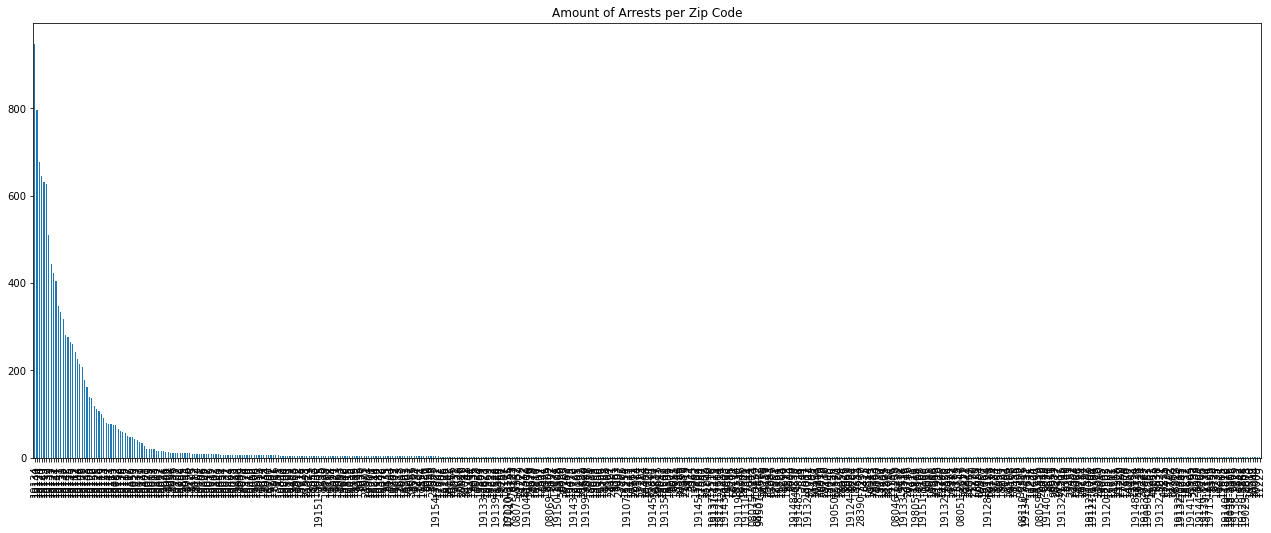

In [76]:
%matplotlib inline
#Bar Graph Displaying the Amount of Arrests per Area/Zip Code
unq_zips = data['Zip'].value_counts()
unq_zips.plot(kind='bar',figsize = (22,8), title = "Amount of Arrests per Zip Code")

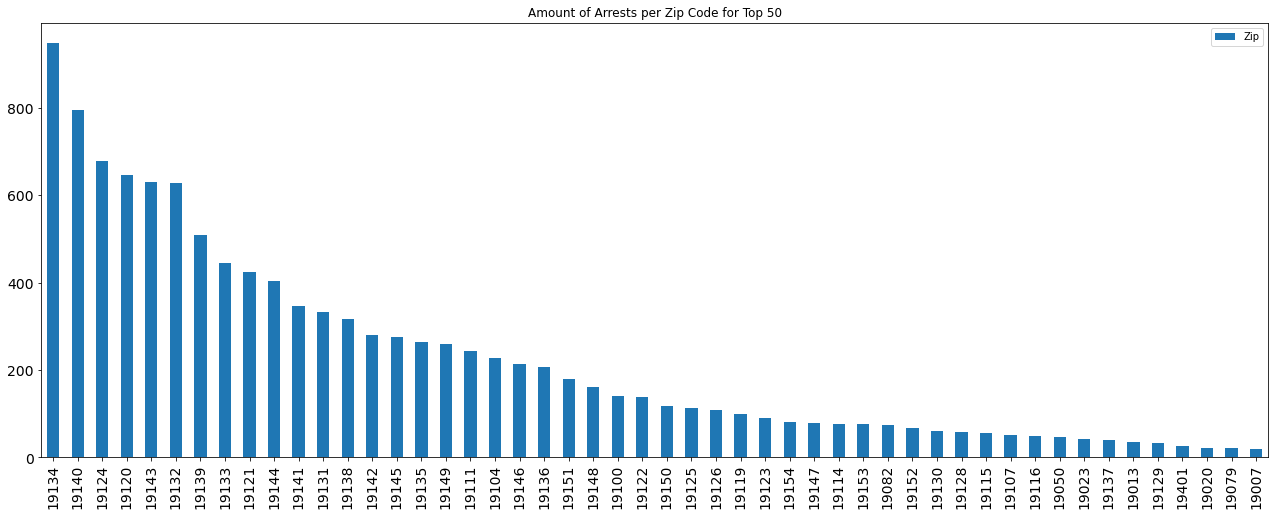

In [84]:
#Bar Graph Displaying the Most Common Arrest Amounts per Area/Zip Code
unq_zips[:50].plot(kind='bar',figsize = (22,8),legend= True, title = "Amount of Arrests per Zip Code for Top 50",fontsize = 14);

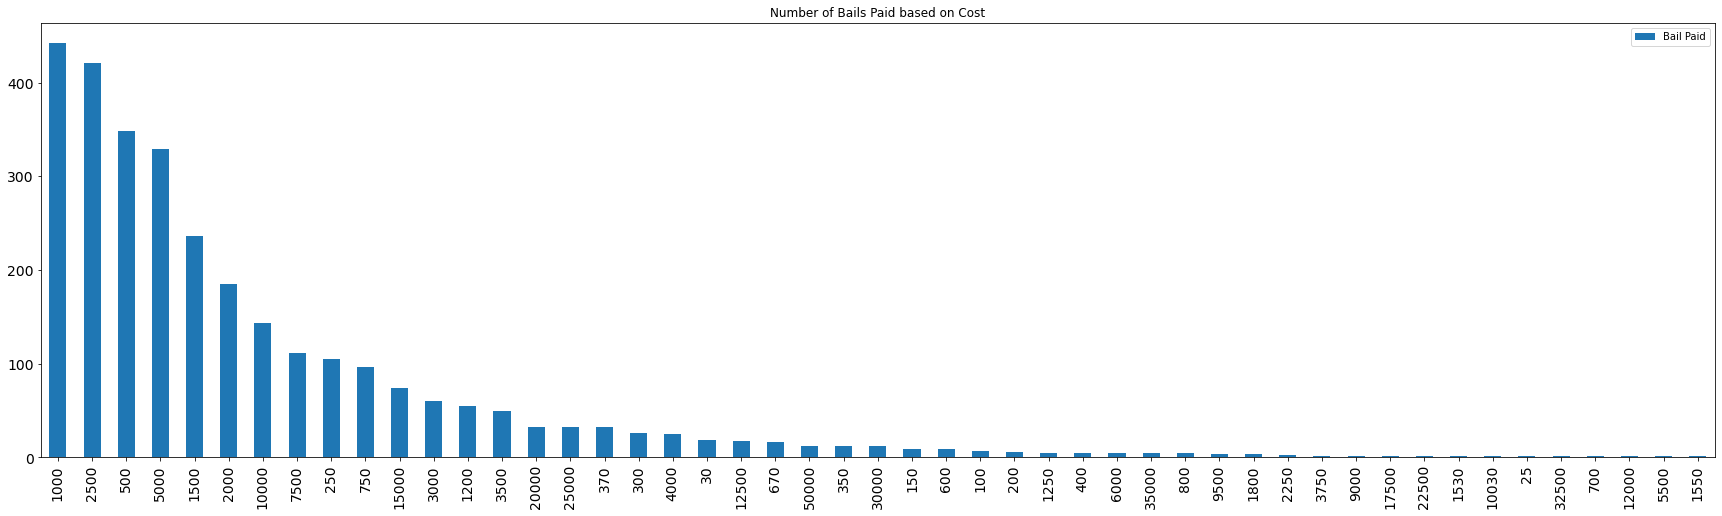

In [82]:
unq_bail = data['Bail Paid'].value_counts()
unq_bail[1:50].plot(kind='bar', figsize = (30,8),legend= True, title = "Number of Bails Paid based on Cost",fontsize = 14);

<AxesSubplot:title={'center':'Bail Amount vs Bail Paid'}, xlabel='Bail Amount', ylabel='Bail Paid'>

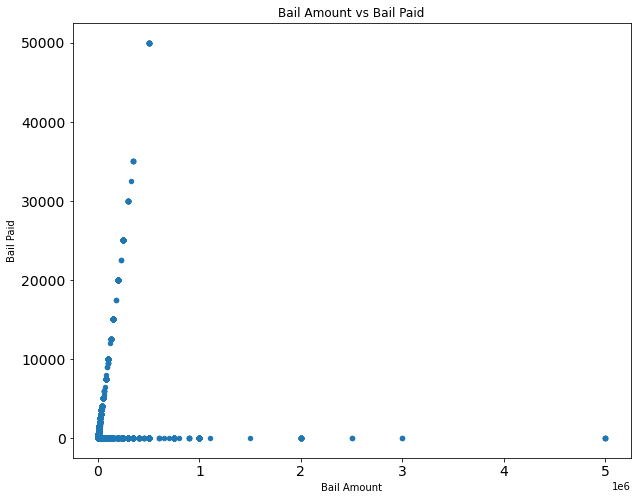

In [87]:
#Scatter Plot of the Bail Amount versus the Bail Paid. There is a larger cluster of 0 values for the Ball Paid when the Bail Amount is Smaller, suggesting
#people are more likely to pay the bail for smaller bail amounts. 
data.plot(kind='scatter', x = "Bail Amount", y = 'Bail Paid', figsize = (10,8),legend= True, title = "Bail Amount vs Bail Paid",fontsize = 14)

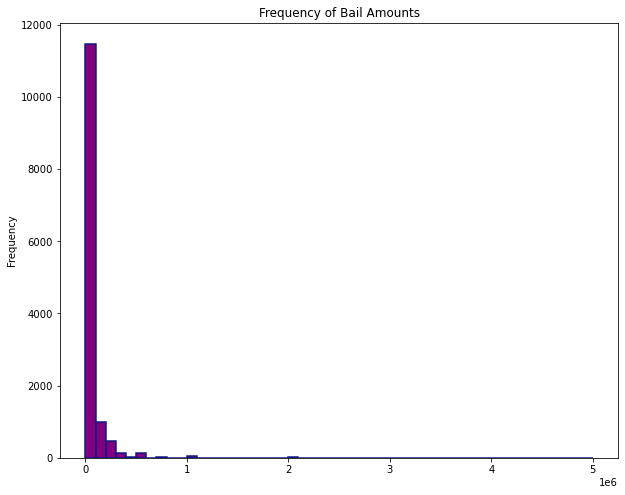

In [105]:
#Histogram of Frequency of Certain Bail Amounts. The most common bail amount is visibly $0.
data['Bail Amount'].plot.hist(title = 'Frequency of Bail Amounts', color='purple', edgecolor='#101883', linewidth = 1.5,bins = 50, figsize = (10,8));

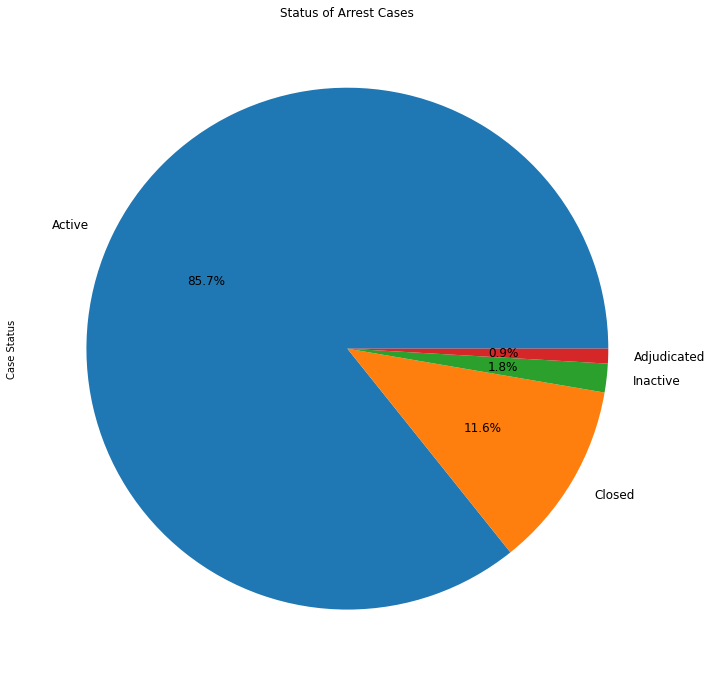

In [106]:
#Pie Chart Demonstrating Percentages of the Status's of the Cases"
unq_status = data['Case Status'].value_counts()
unq_status.plot(kind='pie', title = 'Status of Arrest Cases',figsize = (12,12), fontsize = (12),autopct='%1.1f%%');

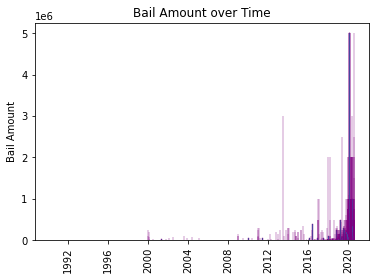

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.bar(x = data['Offense Date'].values, height = data['Bail Amount'].values, width = 3.5, edgecolor = 'purple', linewidth = .4)
plt.xticks(rotation = 'vertical')
plt.title('Bail Amount over Time')
plt.ylabel('Bail Amount');

In [142]:
data['Month']= data['Offense Date'].dt.month
data['Year']= data['Offense Date'].dt.year
data

Index                                           Offenses Offense Date  \
0          0  ['Rape Forcible Compulsion', 'Rape Forcible Co...   2020-05-28   
1          1  ['Aggravated Assault - Attempts to cause SBI o...   2020-05-04   
2          2  ['Simple Assault', 'Simple Assault', 'Reckless...   2020-02-02   
3          3  ['Contraband/Controlled Substance', 'Contraban...   2020-02-10   
4          4  ['Manufacture, Delivery, or Possession With In...   2020-03-13   
...      ...                                                ...          ...   
13433  13433  ['Rape Forcible Compulsion', 'Rape Forcible Co...   2020-01-15   
13434  13434  ['Burglary - Overnight Accommodations; Person ...   2019-12-14   
13435  13435  ['Firearms Not To Be Carried W/O License', 'Fi...   2020-05-03   
13436  13436  ['Possession Of Firearm Prohibited', 'Possessi...   2020-01-19   
13437  13437  ['Terroristic Threats W/ Int To Terrorize Anot...   2019-12-03   

      Arrest Date Case Status         Arresting Officer  \
0      2020-07-27      Active        Bengochea, William   
1      2020-05-04      Active  Soares, Baldomiro J. Jr.   
2      2020-02-12      Active              Jones, James   
3      2020-02-21      Active          Balmer, James M.   
4      2020-03-14      Active             Sima, Raymond   
...           ...         ...                       ...   
13433  2020-02-18      Active         Lapetina, Sean M.   
13434  2020-02-21      Active                   Affiant   
13435  2020-05-04      Active            Kusowski, Mark   
13436  2020-01-20      Closed           Schell, John G.   
13437  2020-03-25      Active              Orth, Daniel   

                                    Attorney Date of Birth    Zip  \
0      Defender Association of  Philadelphia    1993-05-19  19123   
1      Defender Association of  Philadelphia    1997-05-05  19121   
2      Defender Association of  Philadelphia    1986-11-15  19124   
3      Defender Association of  Philadelphia    1980-12-13  19135   
4                      Richard T. Brown Jr.     1997-11-05  19144   
...                                      ...           ...    ...   
13433                     Anthony J. Petrone    1985-12-06  19134   
13434  Defender Association of  Philadelphia    1999-08-15    NaN   
13435  Defender Association of  Philadelphia    1988-06-07  19134   
13436  Defender Association of  Philadelphia    1996-02-25  19100   
13437  Defender Association of  Philadelphia    1984-08-08  19135   

               Bail Set By  Bail Amount  Bail Paid  Bail Date  Bail Type  \
0      Bernard, Francis X.       300000          0 2020-07-28   Monetary   
1           E-Filing Judge        50000       5000 2020-05-05   Monetary   
2           Stack, Patrick         7500        750 2020-02-13   Monetary   
3      Bernard, Francis X.         5000          0 2020-02-21  Unsecured   
4           Stack, Patrick            0          0 2020-03-14        ROR   
...                    ...          ...        ...        ...        ...   
13433       O'Brien, James       100000          0 2020-02-19   Monetary   
13434     Devlin, Kevin R.         7500        750 2020-03-11   Monetary   
13435       E-Filing Judge        50000       5000 2020-05-04   Monetary   
13436       O'Brien, James       150000          0 2020-01-20   Monetary   
13437       O'Brien, James        25000          0 2020-03-26  Unsecured   

                                         Parsed Offenses  Month    Year  \
0      ['False Imprisonment', 'Indec Asslt-W/O Cons O...    5.0  2020.0   
1      ['Aggravated Assault - Attempts to cause SBI o...    5.0  2020.0   
2      ['Recklessly Endangering Another Person', 'Sim...    2.0  2020.0   
3      ['Contraband/Controlled Substance', 'Int Poss ...    2.0  2020.0   
4      ['Conspiracy', 'Int Poss Contr Subst By Per No...    3.0  2020.0   
...                                                  ...    ...     ...   
13433  ['Corruption Of Minors - Defendant Age 18 or A...    1.0  2020.

In [149]:
#data.drop(columns = ['month'],inplace= True)
MayJune2020 = data.loc[(data['Year'] == 2020.0) & (data['Month'] == 5.0) | (data['Month'] == 6.0)]
select_MayJune2020 = MayJune2020.loc[data['Year'] == 2020.0]
select_MayJune2020

Index                                           Offenses Offense Date  \
0          0  ['Rape Forcible Compulsion', 'Rape Forcible Co...   2020-05-28   
1          1  ['Aggravated Assault - Attempts to cause SBI o...   2020-05-04   
5          5  ['Manufacture, Delivery, or Possession With In...   2020-05-11   
6          6  ['Burglary - Not Adapted for Overnight Accommo...   2020-06-07   
13        13  ['Aggravated Assault - Attempts to cause SBI o...   2020-05-23   
...      ...                                                ...          ...   
13400  13400  ['Firearms Not To Be Carried W/O License', 'Fi...   2020-05-12   
13408  13408  ['Rape Forcible Compulsion', 'Rape Forcible Co...   2020-06-12   
13423  13423  ['Contempt For Violation of Order or Agreement...   2020-05-03   
13424  13424  ['Receiving Stolen Property', 'Receiving Stole...   2020-05-14   
13435  13435  ['Firearms Not To Be Carried W/O License', 'Fi...   2020-05-03   

      Arrest Date Case Status         Arresting Officer  \
0      2020-07-27      Active        Bengochea, William   
1      2020-05-04      Active  Soares, Baldomiro J. Jr.   
5      2020-05-12      Active             Carson, Allen   
6      2020-06-08      Active             Banks, Isaiah   
13     2020-05-23      Active            Kvalsvik, Mark   
...           ...         ...                       ...   
13400  2020-05-13      Active             Lapenta, Mark   
13408  2020-06-13      Active         James, Michael W.   
13423  2020-05-04      Active    Gilman, Christopher S.   
13424  2020-05-17      Active       Jackson, Ronald A .   
13435  2020-05-04      Active            Kusowski, Mark   

                                    Attorney Date of Birth    Zip  \
0      Defender Association of  Philadelphia    1993-05-19  19123   
1      Defender Association of  Philadelphia    1997-05-05  19121   
5      Defender Association of  Philadelphia    1996-08-31  19120   
6      Defender Association of  Philadelphia    1981-07-06    NaN   
13     Defender Association of  Philadelphia    1996-09-06  19147   
...                                      ...           ...    ...   
13400                       Darryl A. Irwin     2001-07-27  19132   
13408  Defender Association of  Philadelphia    1964-01-22  19133   
13423  Defender Association of  Philadelphia    1985-12-06  19116   
13424  Defender Association of  Philadelphia    1986-07-10  19131   
13435  Defender Association of  Philadelphia    1988-06-07  19134   

               Bail Set By  Bail Amount  Bail Paid  Bail Date  Bail Type  \
0      Bernard, Francis X.       300000          0 2020-07-28   Monetary   
1           E-Filing Judge        50000       5000 2020-05-05   Monetary   
5           Stack, Patrick       100000          0 2020-05-12  Unsecured   
6           E-Filing Judge        10000          0 2020-06-08  Unsecured   
13          O'Brien, James        10000       1000 2020-05-24   Monetary   
...                    ...          ...        ...        ...        ...   
13400       Stack, Patrick       500000          0 2020-05-13   Monetary   
13408       Stack, Patrick       100000          0 2020-06-13   Monetary   
13423       E-Filing Judge        25000          0 2020-05-04  Unsecured   
13424       O'Brien, James        10000          0 2020-05-17  Unsecured   
13435       E-Filing Judge        50000       5000 2020-05-04   Monetary   

                                         Parsed Offenses  Month    Year  \
0      ['False Imprisonment', 'Indec Asslt-W/O Cons O...    5.0  2020.0   
1      ['Aggravated Assault - Attempts to cause SBI o...    5.0  2020.0   
5      ['Int Poss Contr Subst By Per Not Reg', 'Manuf...    5.0  2020.0   
6      ['Burglary - Not Adapted for Overnight Accommo...    6.0  2020.0   
13     ['Aggravated Assault - Attempts to cause SBI o...    5.0  2020.0   
...                                                  ...    ...     ...   
13400  ['Carry Firearms Public In Phila', 'Firearms N...    5.0  2020.

<AxesSubplot:title={'center':'Offense Date vs Amount of Offenses'}, xlabel='Offense Date'>

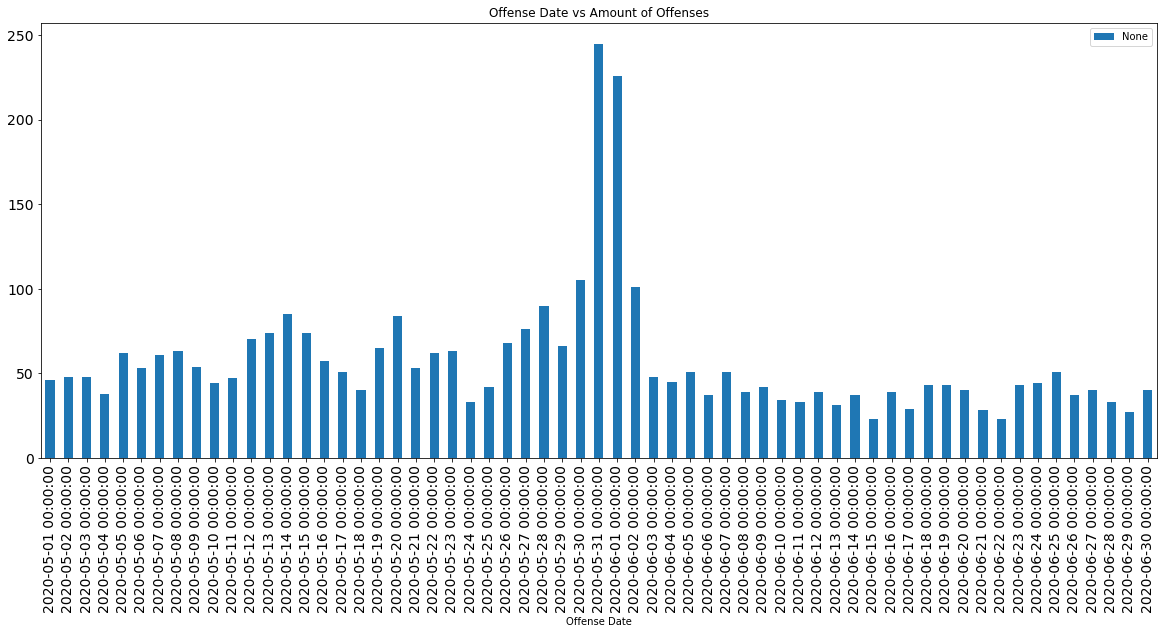

In [160]:
counts = select_MayJune2020.groupby(['Offense Date']).size()
counts.plot(kind='bar',figsize = (20,8),legend= True, title = "Offense Date vs Amount of Offenses",fontsize = 14)